In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sf_airbnb = pd.read_csv("listings.csv")

In [3]:
pd.set_option('display.max_columns',100)
sf_airbnb.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7923146,https://www.airbnb.com/rooms/7923146,20230605012656,2023-06-05,city scrape,Condo in San Francisco · ★4.95 · 2 bedrooms · ...,Great views! <br />Excellent location!<br />2b...,Our location is what you expect of SF. <br />H...,https://a0.muscache.com/pictures/100949457/891...,41781093,https://www.airbnb.com/users/show/41781093,Virginia,2015-08-18,"San Francisco, CA",I'm a native costarrican that met the love of ...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/0c16c...,https://a0.muscache.com/im/pictures/user/0c16c...,Telegraph Hill,1,2,"['email', 'phone']",t,t,"San Francisco, California, United States",North Beach,NaN,37.80226,-122.40818,Entire condo,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Iron"", ""Cleaning products"", ""Microwave"", ""Fa...",$417.00,2,15,2.0,2.0,15.0,15.0,2.0,15.0,NaN,t,5,17,17,17,2023-06-05,149,17,2,2015-09-28,2023-05-30,4.95,4.97,4.95,4.98,5.0,4.99,4.74,STR-0005824,f,1,1,0,0,1.59


In [4]:
sf_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7208 non-null   int64  
 1   listing_url                                   7208 non-null   object 
 2   scrape_id                                     7208 non-null   int64  
 3   last_scraped                                  7208 non-null   object 
 4   source                                        7208 non-null   object 
 5   name                                          7208 non-null   object 
 6   description                                   7165 non-null   object 
 7   neighborhood_overview                         5028 non-null   object 
 8   picture_url                                   7208 non-null   object 
 9   host_id                                       7208 non-null   i

In [5]:
sf_airbnb[["room_type","neighbourhood_cleansed","latitude","longitude","price"]]

,room_type,neighbourhood_cleansed,latitude,longitude,price
0,Entire home/apt,North Beach,37.802260,-122.408180,$417.00
1,Entire home/apt,South of Market,37.776050,-122.415930,$280.00
2,Entire home/apt,Noe Valley,37.750430,-122.426090,$195.00
3,Private room,South of Market,37.776214,-122.416405,$60.00
4,Private room,Castro/Upper Market,37.758919,-122.434776,$120.00
...,...,...,...,...,...
7203,Entire home/apt,Haight Ashbury,37.762870,-122.450920,$100.00
7204,Entire home/apt,Haight Ashbury,37.769100,-122.438230,$164.00
7205,Entire home/apt,Inner Sunset,37.762590,-122.453700,$85.00
7206,Private room,Western Addition,37.776985,-122.428947,$145.00


In [6]:
sf_airbnb["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [7]:
csv_tableau = sf_airbnb[["room_type","neighbourhood_cleansed","latitude","longitude","price","last_review"]]

In [8]:
csv_tableau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   room_type               7208 non-null   object 
 1   neighbourhood_cleansed  7208 non-null   object 
 2   latitude                7208 non-null   float64
 3   longitude               7208 non-null   float64
 4   price                   7208 non-null   object 
 5   last_review             5790 non-null   object 
dtypes: float64(2), object(4)
memory usage: 338.0+ KB


In [9]:
csv_tableau['price'] = csv_tableau['price'].replace('[\$,]', '', regex=True).astype(float)
csv_tableau['last_review'] = pd.to_datetime(csv_tableau['last_review'])

/var/folders/pp/wsnz9mn5029c6xz67331mhdh0000gn/T/ipykernel_19622/333311119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_tableau['price'] = csv_tableau['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/pp/wsnz9mn5029c6xz67331mhdh0000gn/T/ipykernel_19622/333311119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_tableau['last_review'] = pd.to_datetime(csv_tableau['last_review'])


In [10]:
csv_tableau.describe()

,latitude,longitude,price
count,7208.000000,7208.000000,7208.000000
mean,37.768227,-122.430452,348.344617
std,0.023242,0.027636,1630.442004
min,37.708480,-122.512460,0.000000
25%,37.752785,-122.443412,100.000000
50%,37.772570,-122.423240,160.000000
75%,37.787463,-122.410546,261.000000
max,37.811960,-122.358480,71499.000000


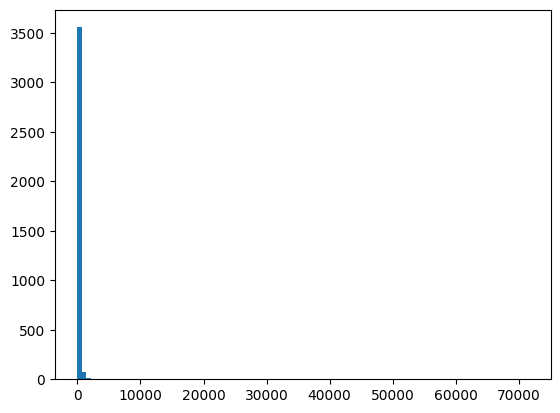

In [24]:
plt.hist(csv_tableau['price'], bins=100)
plt.show()

In [25]:
csv_tableau = csv_tableau[csv_tableau['price'] < csv_tableau['price'].quantile(0.99)]


In [28]:
csv_tableau = csv_tableau[csv_tableau["last_review"] > '2022-12-31']

In [29]:
csv_tableau.to_csv("sf_airbnb_rent.csv",index=False)